## Contents

* [Scatter Plot](#Scatter-Plot)  
  
* [Distribution Plots](#Distribution-Plots)
 1. [Rugplot](#1.-rugplot())
 2. [Displot](#2.-displot())
 3. [Histplot](#3.-histplot())
 4. [Kdeplot](#4.-kdeplot())
  
* [Categorical Plots](#Categorical-Plots)
 1. [Countplot](#1.-countplot())
 2. [Barplot](#2.-barplot())
  
* [Categorical Plots - Distribution within Categories](#Categorical-Plots---Distribution-within-Categories)
 1. [Boxplot](#1.-boxplot())
 2. [Violinplot](#2.-violinplot())
 3. [Advanced Plots](#3.-Advanced-plots)
   1. [Swarmplot](#3.1-swarmplot())
   2. [Boxenplot (letter-value plot)](#3.2-boxenplot-(letter-value-plot))
  
* [Comparison Plots](#Comparison-Plots)
 1. [jointplot](#1.-jointplot())
 2. [pairplot](#2.-pairplot())
  
* [Grids](#Grids)
 1. [Catplot](#1.catplot())
 2. [PairGrid](#2.PairGrid())
 3. [FacetGrid](#3.FacetGrid())
  
* [Matrix Plots](#Matrix-Plots)
 1. [Heatmap](#1.heatmap())
 2. [Clustermap](#2.clustermap())
   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot

In [2]:
df = pd.read_csv('../Notebooks/05-Seaborn/dm_office_sales.csv')

In [3]:
df.sample(5)

,division,level of education,training level,work experience,salary,sales
789,printers,associate's degree,1,5,86298,278249
498,printers,some college,3,3,77596,314899
150,computer hardware,some college,1,2,65117,198779
730,printers,associate's degree,1,6,91256,329556
263,computer hardware,high school,3,5,93144,425338


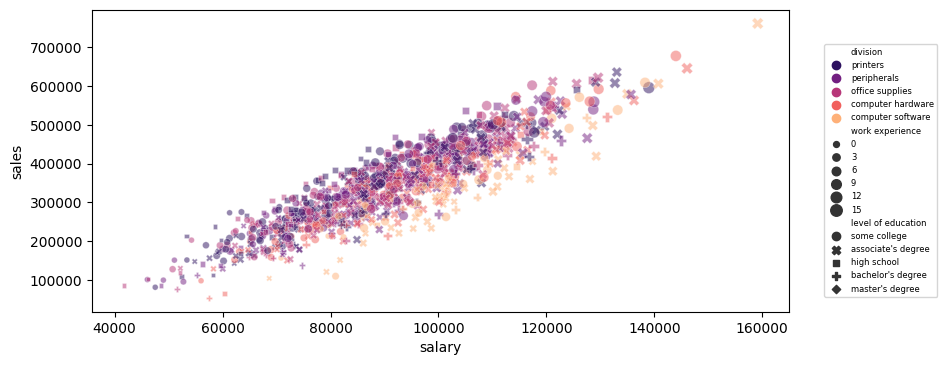

In [4]:
plt.figure(figsize=(9,4),dpi=100)

sns.scatterplot(x='salary', y='sales', data=df, hue='division', palette='magma', style='level of education',
               size='work experience', alpha=0.5)

plt.legend(loc=(1.05,.05), prop={'size': 6});

# Distribution Plots

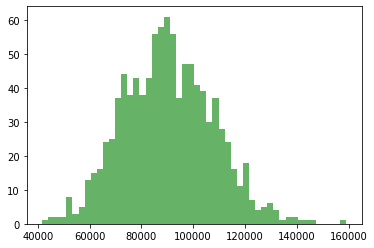

In [5]:
# iF I want a hist plot without displot

plt.hist(df['salary'], bins=50, color='green', alpha=0.6);

## 1. rugplot()

No handles with labels found to put in legend.


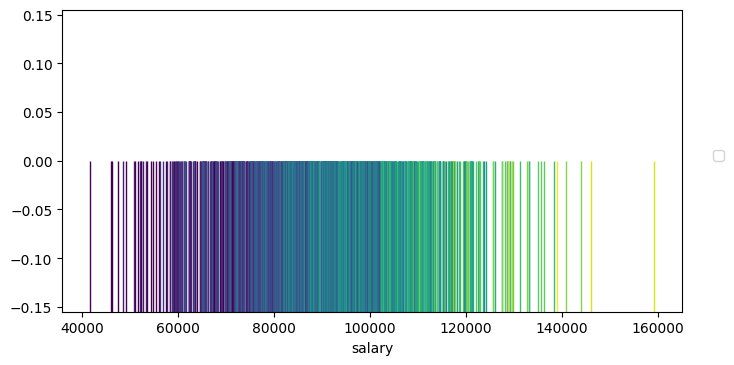

In [6]:
plt.figure(figsize=(8,4), dpi=100)

sns.rugplot(data=df, x='salary', height=0.5, hue='work experience', palette='viridis', expand_margins=True)

plt.legend(loc=(1.05, 0.5))

## 2. displot()
it has more things that will be practiced later

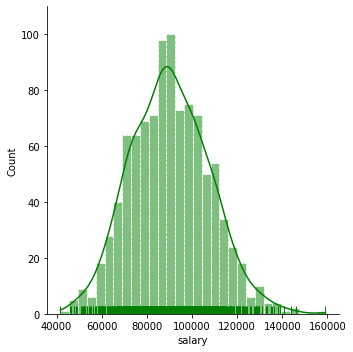

In [7]:
# Background
# sns.set(style='white')

sns.displot(df, x='salary', bins=30, color='green',
            edgecolor='white', lw=1, ls='--',
            kde=True, rug=True);

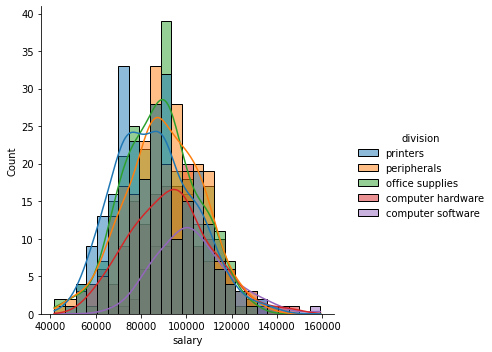

In [8]:
# Background
# sns.set(style='ticks')

sns.displot(df, x='salary', hue='division', kde=True);

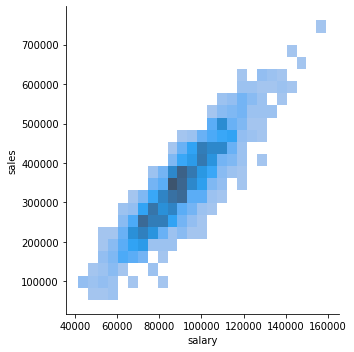

In [9]:
sns.displot(df, x='salary', y = 'sales', );

## 3. histplot()

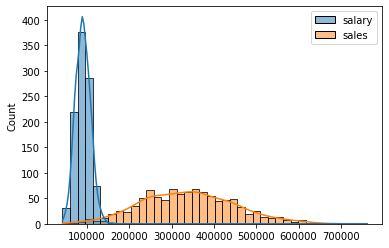

In [10]:
sns.histplot(df[['salary','sales']], bins=40, kde=True);

<AxesSubplot:xlabel='salary', ylabel='Count'>

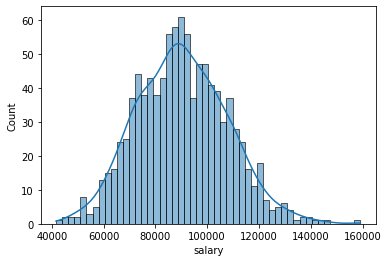

In [11]:
sns.histplot(df['salary'], bins=50, kde=True)

<AxesSubplot:xlabel='salary', ylabel='sales'>

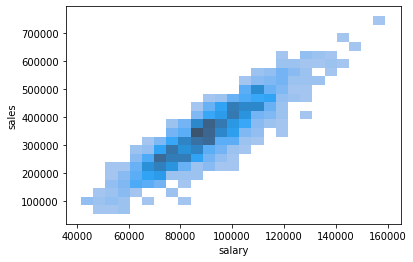

In [12]:
sns.histplot(x=df['salary'], y= df['sales'])

## 4. kdeplot()

<AxesSubplot:xlabel='salary', ylabel='Density'>

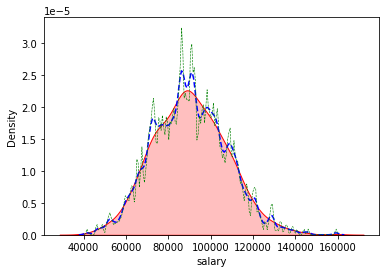

In [13]:
sns.kdeplot(df['salary'], shade=True, color='red')
sns.kdeplot(df['salary'], shade=False, color='blue', bw_adjust=0.3, ls='--')
sns.kdeplot(df['salary'], shade=False, color='green', bw_adjust=0.1, lw=0.6, ls='--')

<AxesSubplot:xlabel='salary', ylabel='Density'>

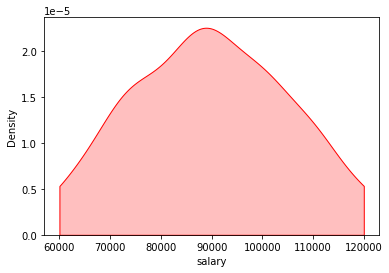

In [14]:
sns.kdeplot(df['salary'], shade=True, color='red', clip=[60000,120000])

C:\Users\rafes\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='sales'>

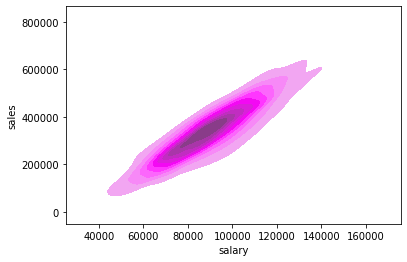

In [15]:
sns.kdeplot(df['salary'], df['sales'], shade=True, color='purple')

# Categorical Plots

## 1. countplot()

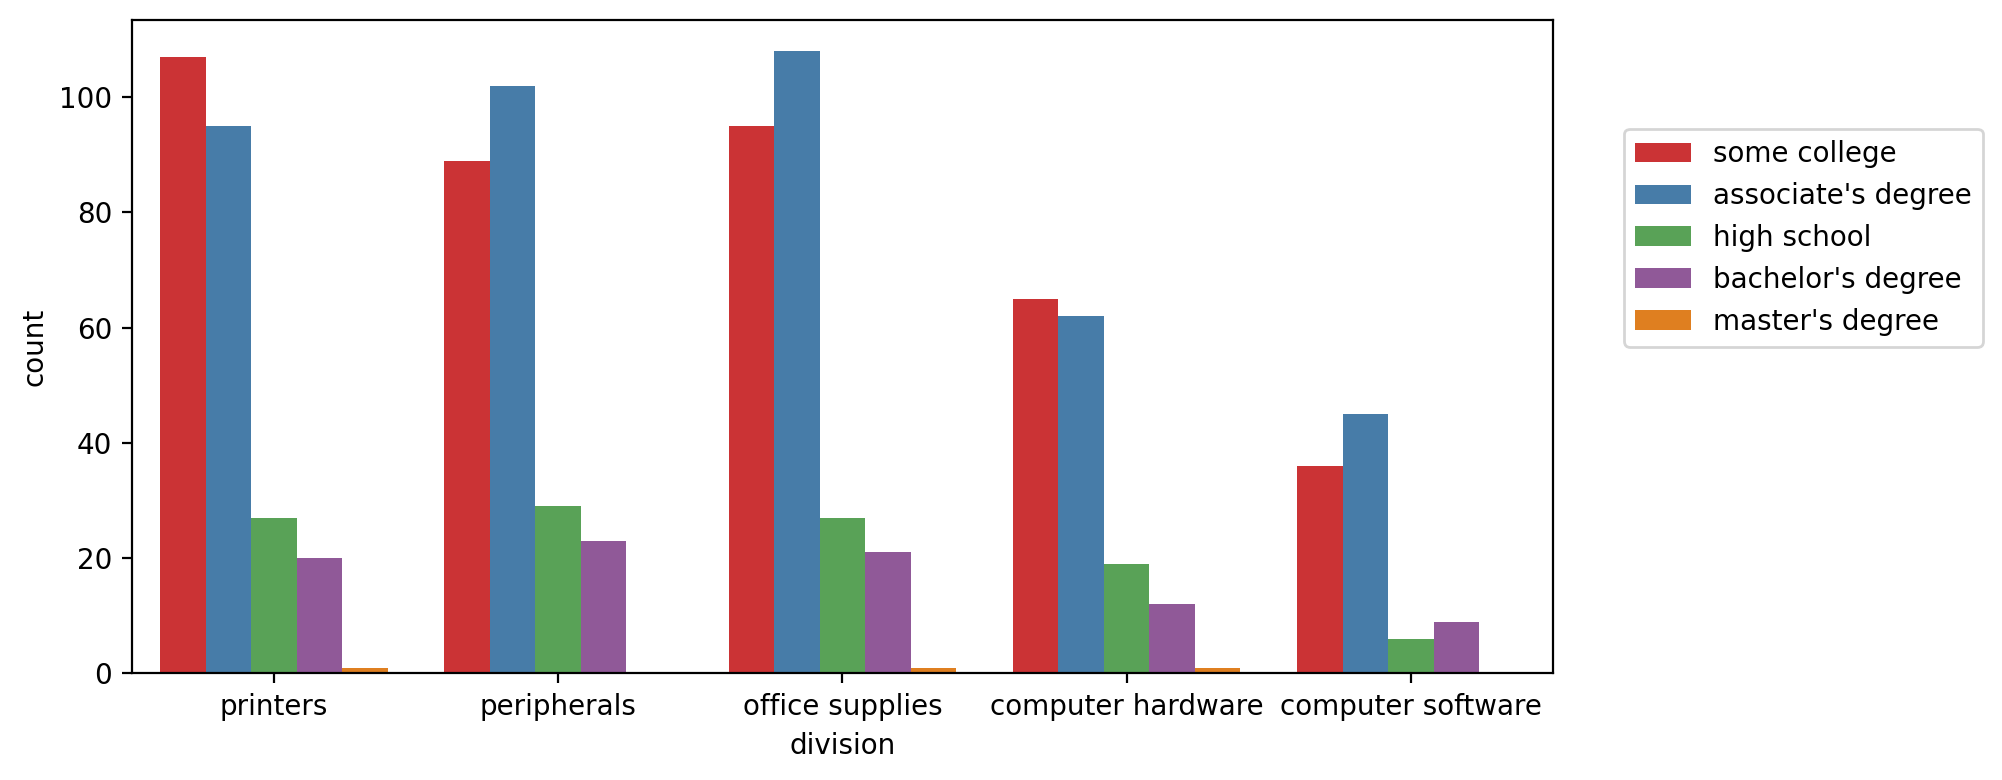

In [16]:
plt.figure(figsize=(8,4), dpi=200)

sns.countplot(x=df['division'], hue=df['level of education'], palette='Set1', orient='v', )

plt.tight_layout()
plt.legend(loc=(1.05,0.5))

## 2. barplot()

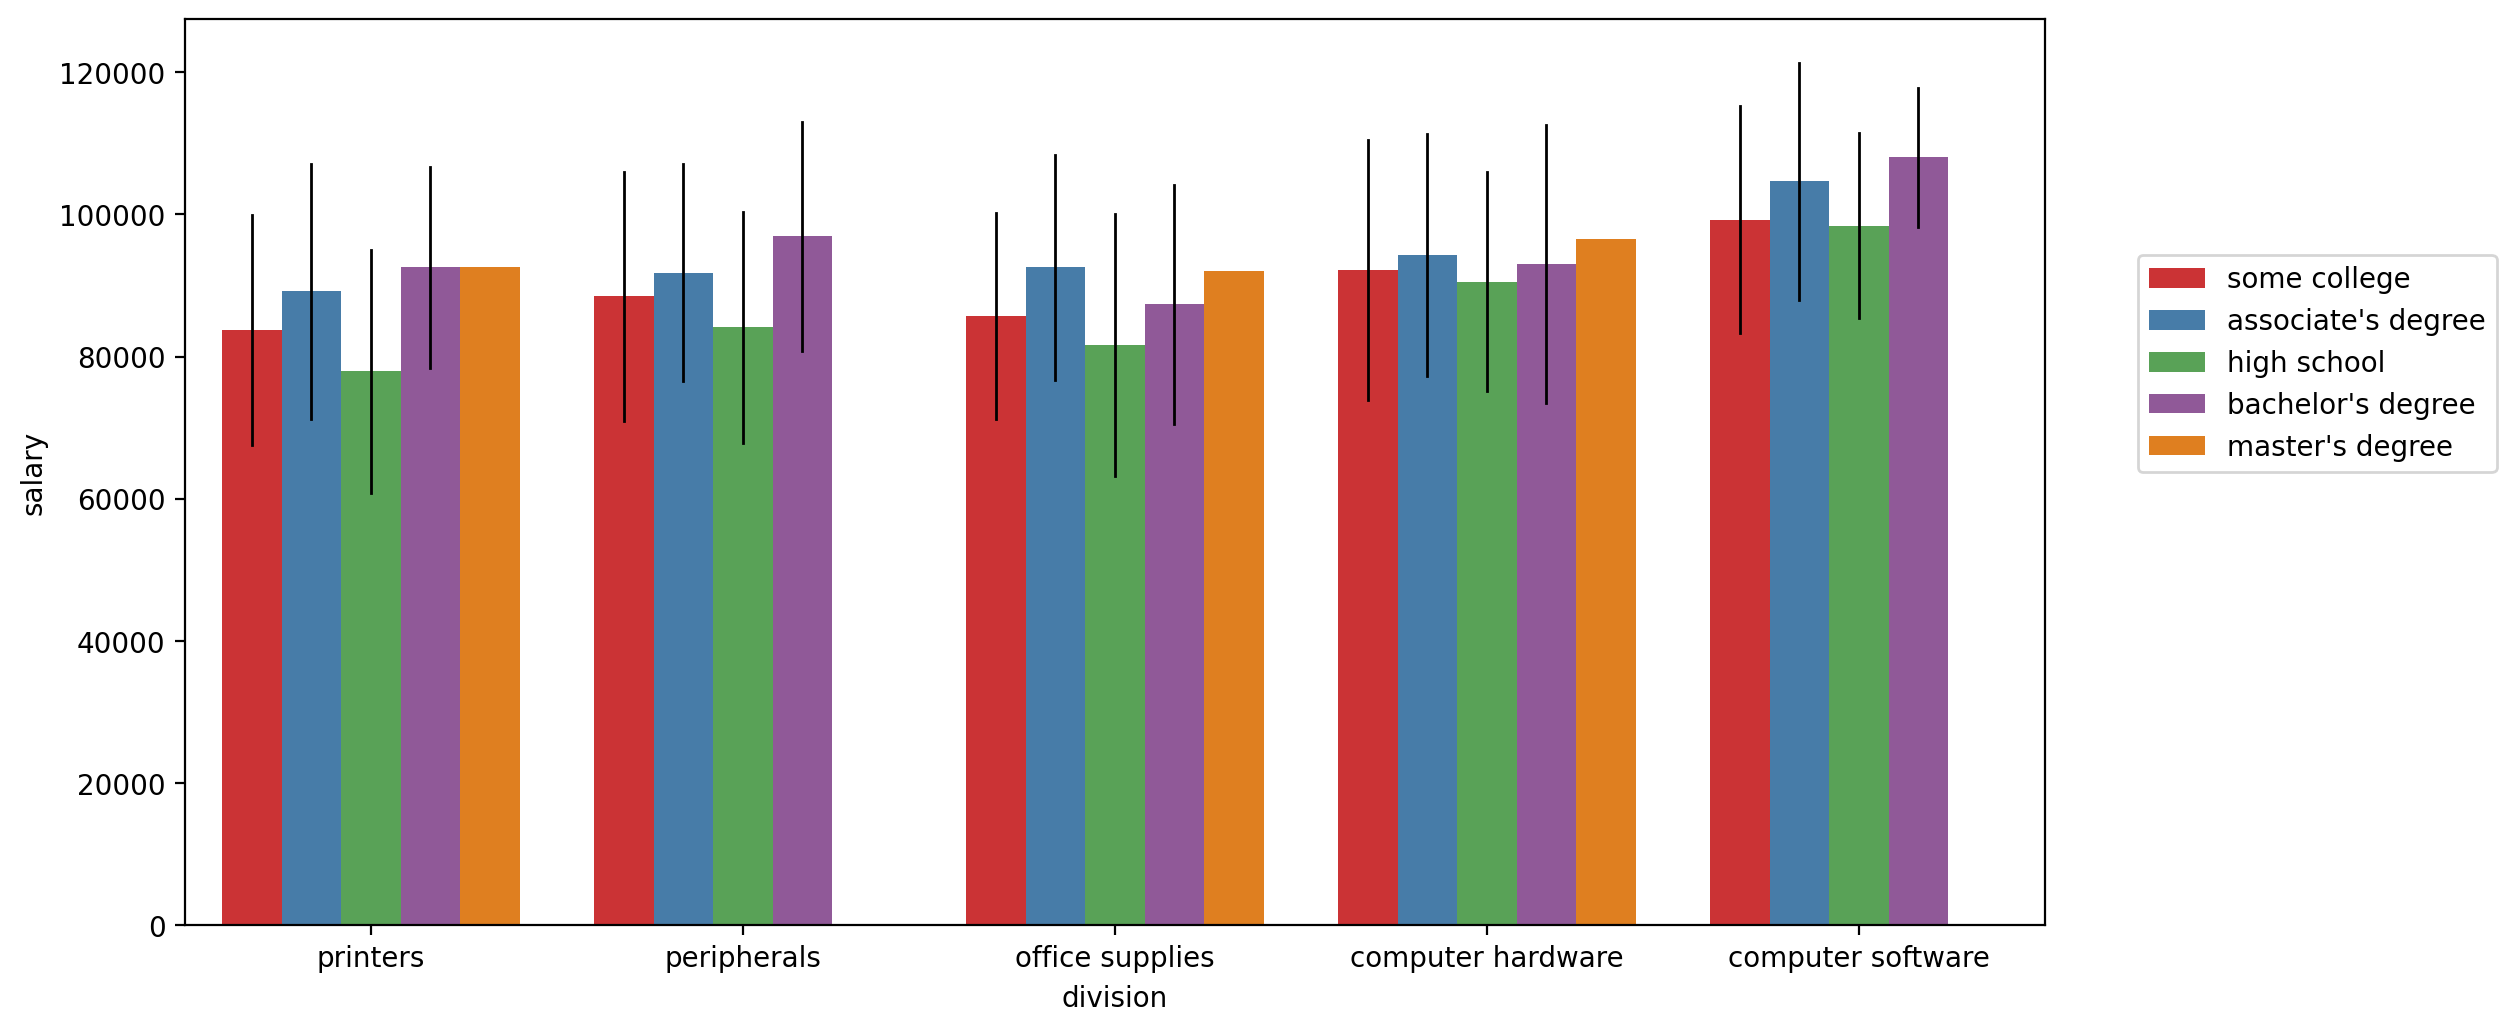

In [17]:
plt.figure(figsize=(12,6), dpi=200)

sns.barplot(data=df, x='division', y= 'salary', palette='Set1',
            hue='level of education', 
            estimator=np.mean, 
            ci='sd', errcolor='black', errwidth=1)

plt.legend(loc=(1.05,0.5))

# Categorical Plots - Distribution within Categories

In [18]:
df = pd.read_csv('../Notebooks/05-Seaborn/StudentsPerformance.csv')

In [19]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
876,male,group D,some college,standard,none,81,82,84
869,male,group C,associate's degree,free/reduced,none,49,51,51
700,female,group E,bachelor's degree,standard,completed,79,81,82
796,male,group D,high school,standard,none,70,70,70
647,female,group E,high school,free/reduced,none,64,62,68


## 1. boxplot()

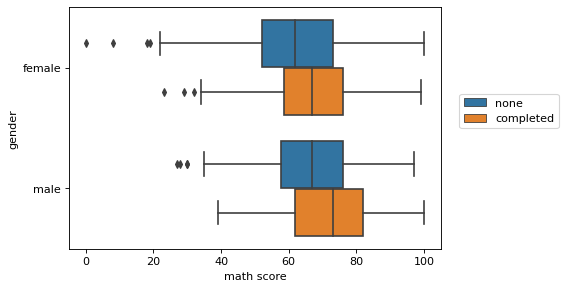

In [20]:
plt.figure(dpi=80)

sns.boxplot(x='math score', y='gender' , data=df, width=0.8,
            hue='test preparation course')

plt.legend(loc=(1.05,0.5));

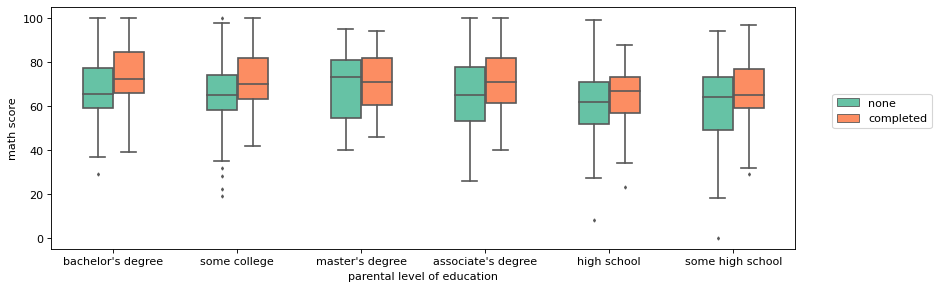

In [21]:
plt.figure(figsize=(12,4) ,dpi=80)

sns.boxplot(x='parental level of education', y='math score' , data=df,
            palette='Set2', width=0.5, saturation=1, whis=1.5, fliersize=2, dodge=True,
            hue='test preparation course')

plt.legend(loc=(1.05,0.5));

## 2. violinplot()

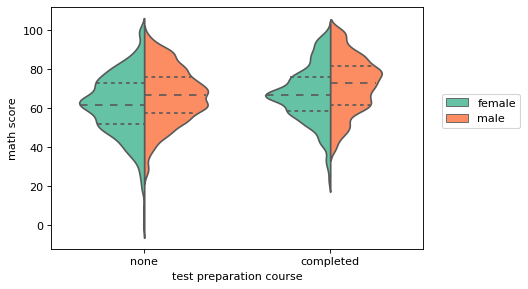

In [22]:
plt.figure(dpi=80)

sns.violinplot(x= 'test preparation course', y='math score', data=df, palette='Set2', saturation=1,
               split=True, bw=0.2, width=0.7, 
               hue='gender', inner='quartile')

plt.legend(loc=(1.05,0.5));

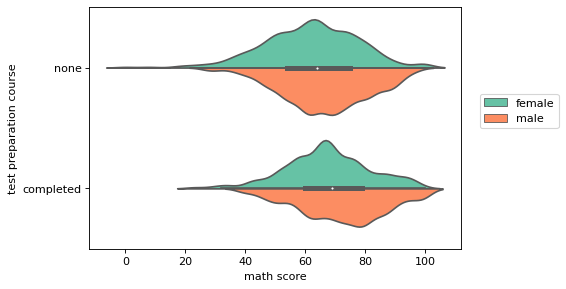

In [23]:
plt.figure(dpi=80)

sns.violinplot(x= 'math score', y='test preparation course', data=df, palette='Set2', saturation=1,
               split=True, bw=0.2, width=0.8, 
               hue='gender', inner='box')

plt.legend(loc=(1.05,0.5))

## 3. Advanced plots
May require to educate the viewer with how the plot is actually constructed

### 3.1 swarmplot()

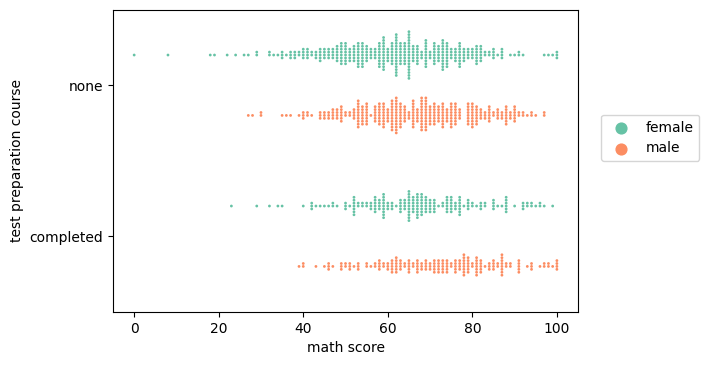

In [24]:
plt.figure(dpi=100)

sns.swarmplot(x= 'math score', y = 'test preparation course', data=df, size=2,
              palette='Set2', dodge=True, alpha=1,
              hue='gender')

plt.legend(loc=(1.05,0.5))

### 3.2 boxenplot (letter-value plot)
Official Paper on this plot: https://vita.had.co.nz/papers/letter-value-plot.html

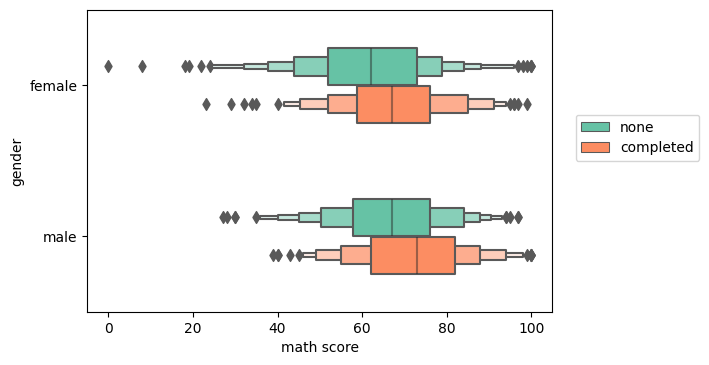

In [25]:
plt.figure(dpi=100)

#k_depth ['proportion', 'tukey', 'trustworthy', 'full']

sns.boxenplot(x='math score', y='gender', data=df, saturation=1, palette='Set2', width=0.5,
             hue='test preparation course', k_depth='tukey')

plt.legend(loc=(1.05,0.5))

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

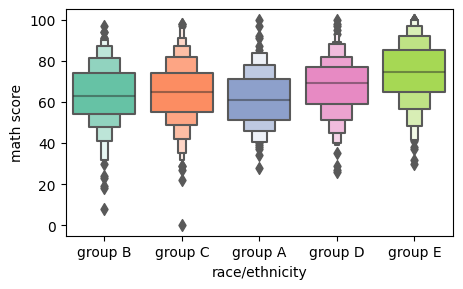

In [26]:
plt.figure(dpi=100, figsize=(5,3))
sns.boxenplot(x='race/ethnicity',y='math score',data=df ,saturation=10, palette='Set2')

# Comparison Plots

## 1. jointplot()

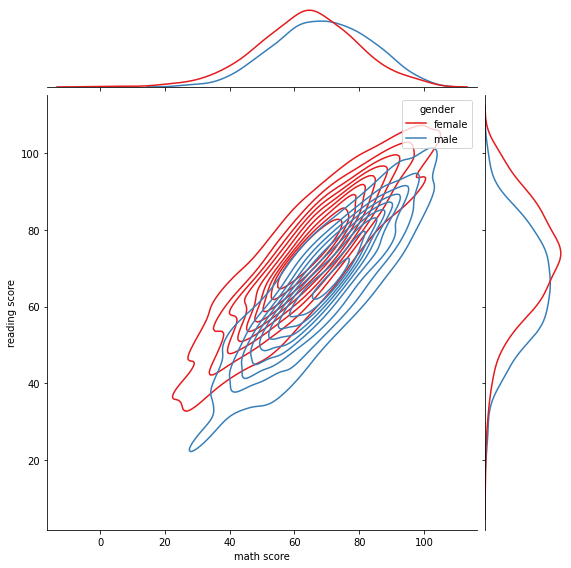

In [27]:
sns.jointplot(x='math score', y='reading score', data=df, palette='Set1', kind='kde',
               height=8, ratio=5, space=0.1, hue='gender');

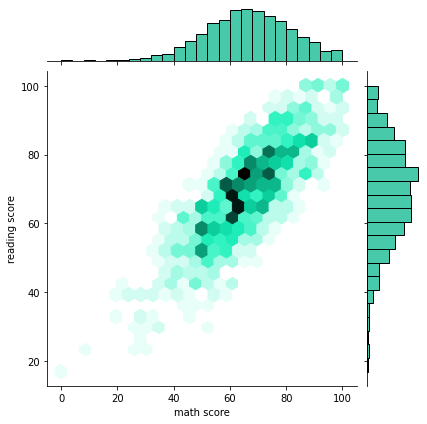

In [28]:
sns.jointplot(x='math score', y='reading score', data=df, color='#0bb88c', kind='hex',
               height=6, ratio=5, space=0.2);

# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

## 2. pairplot()

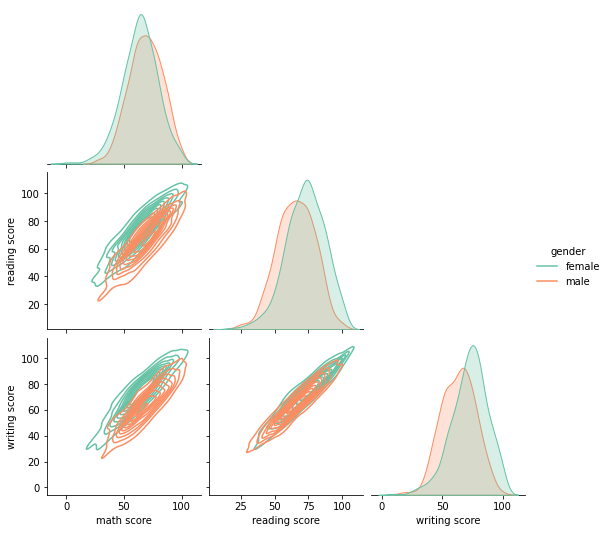

In [29]:
sns.pairplot(df, hue='gender', palette='Set2', kind='kde', corner=True)

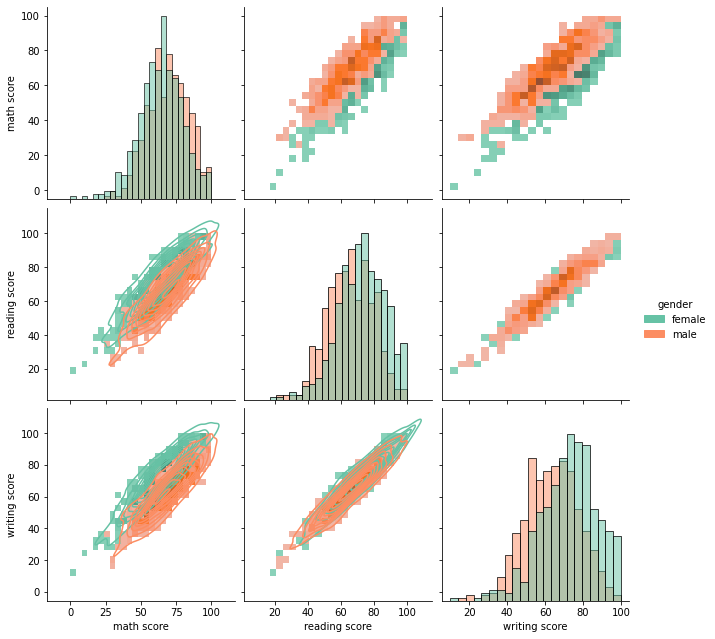

In [30]:
s = sns.pairplot(df, hue='gender', palette='Set2', kind='hist', diag_kind='hist', height=3)
s.map_lower(sns.kdeplot)

# Grids

## 1.catplot()

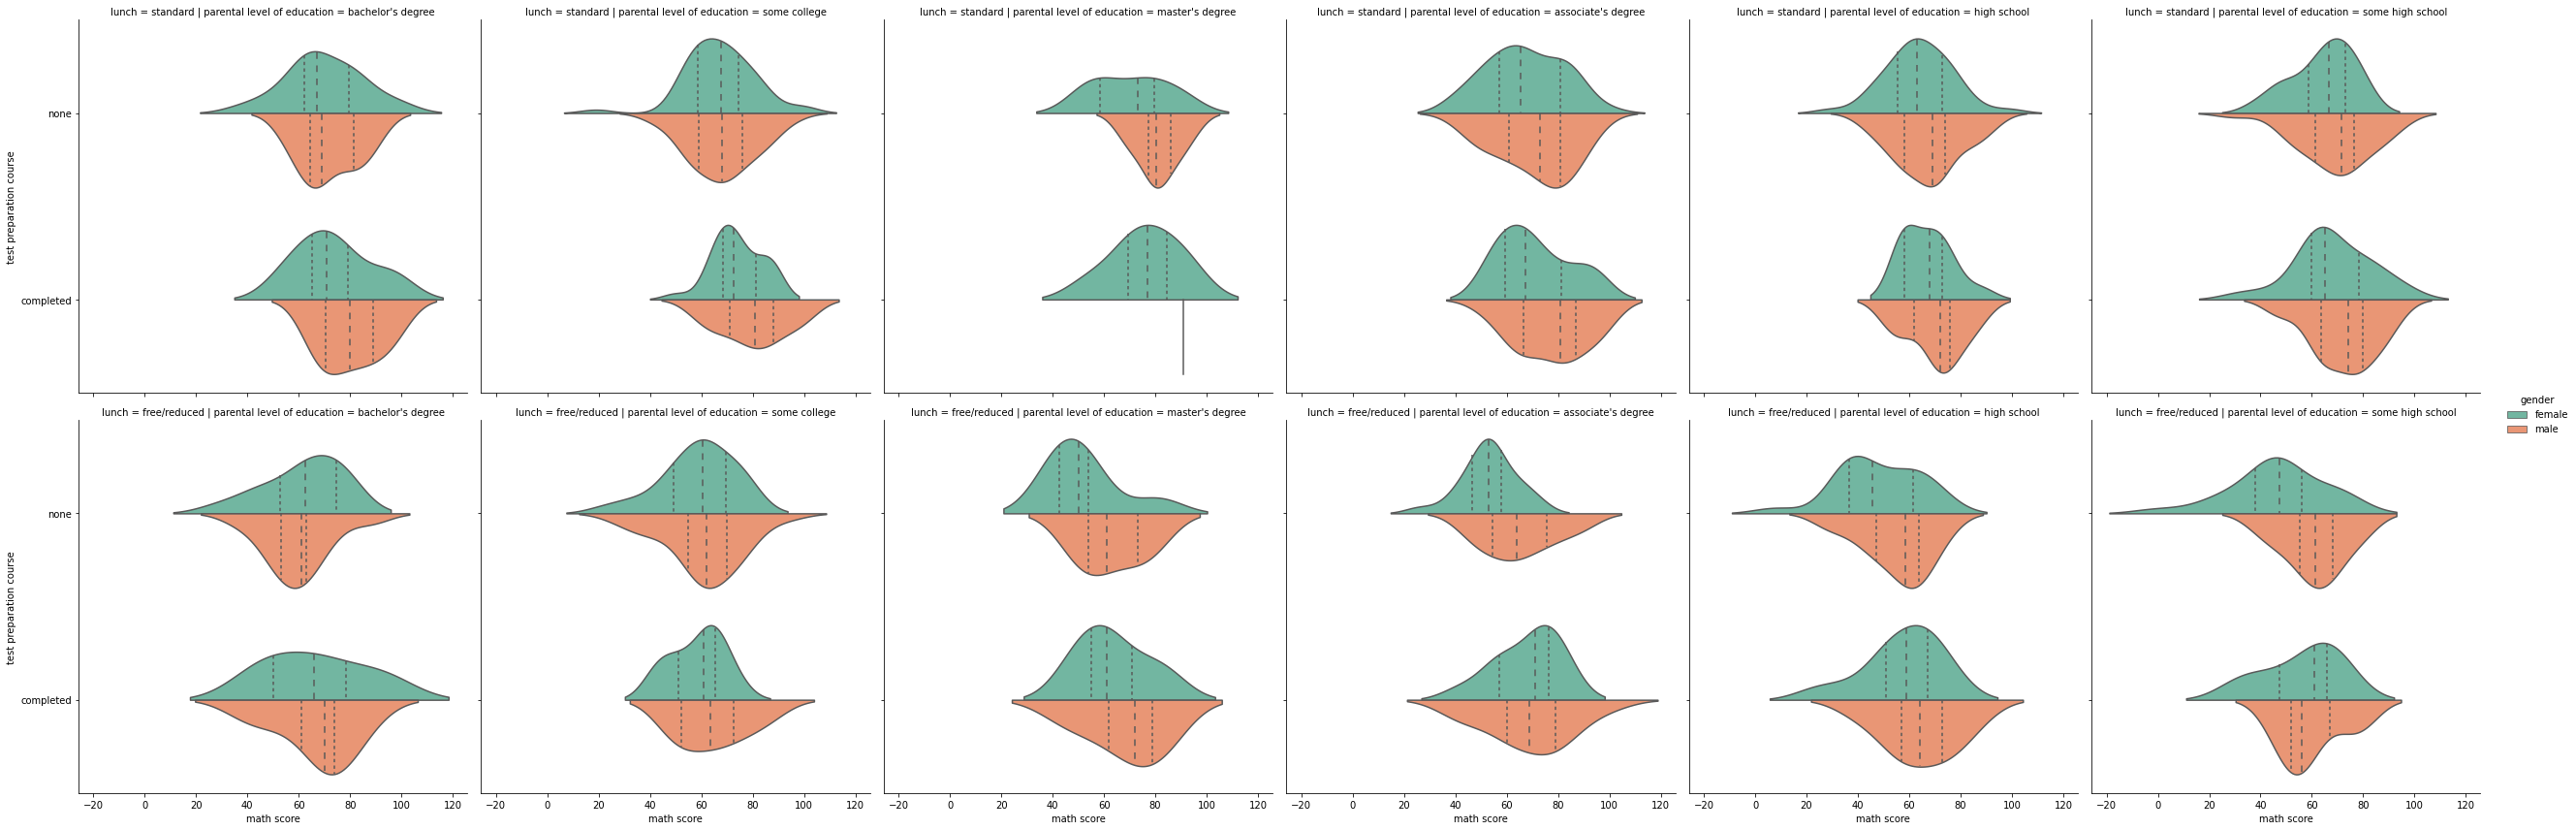

In [31]:
# Kind Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”

sns.catplot(x='math score', y='test preparation course', data=df, kind='violin', hue='gender', 
            split=True, palette='Set2', inner='quartile',
            col='parental level of education', row='lunch',
            height=6);

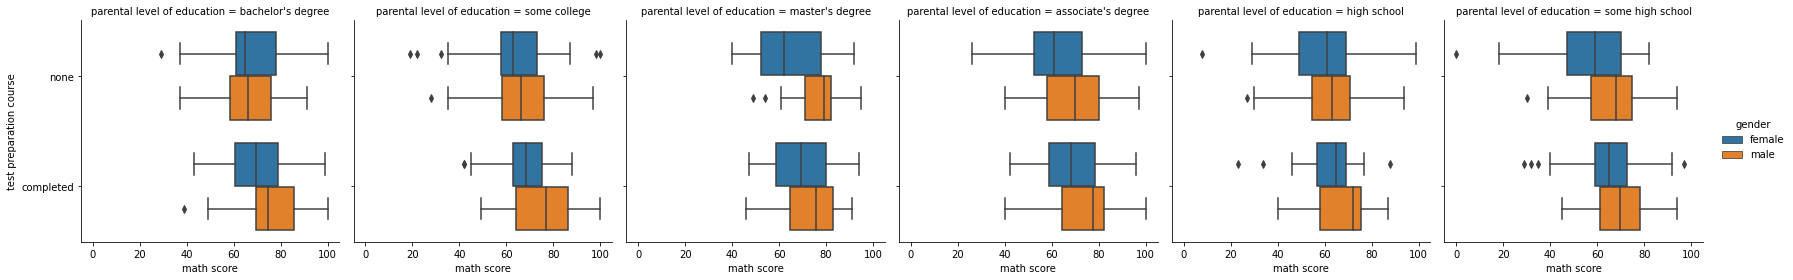

In [32]:
sns.catplot(x='math score', y='test preparation course', data=df, kind='box',
           hue='gender', 
           col='parental level of education', 
           height=4);

## 2.PairGrid()

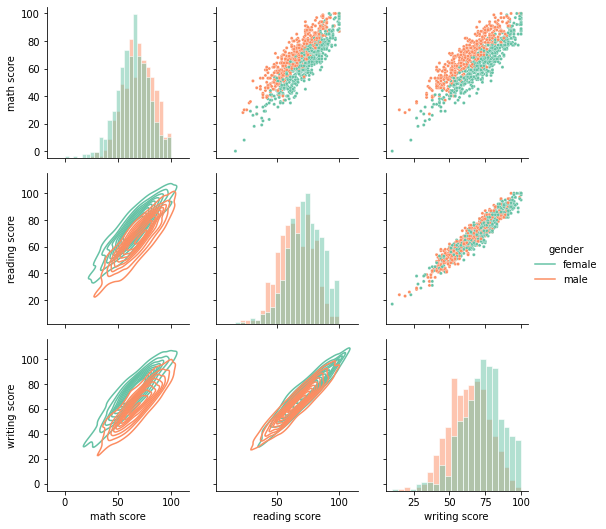

In [33]:
p = sns.PairGrid(df, hue='gender', palette='Set2')
p = p.map_upper(sns.scatterplot, s=10)
p = p.map_diag(sns.histplot,  edgecolor='w')
p = p.map_lower(sns.kdeplot)
p = p.add_legend();

## 3.FacetGrid()

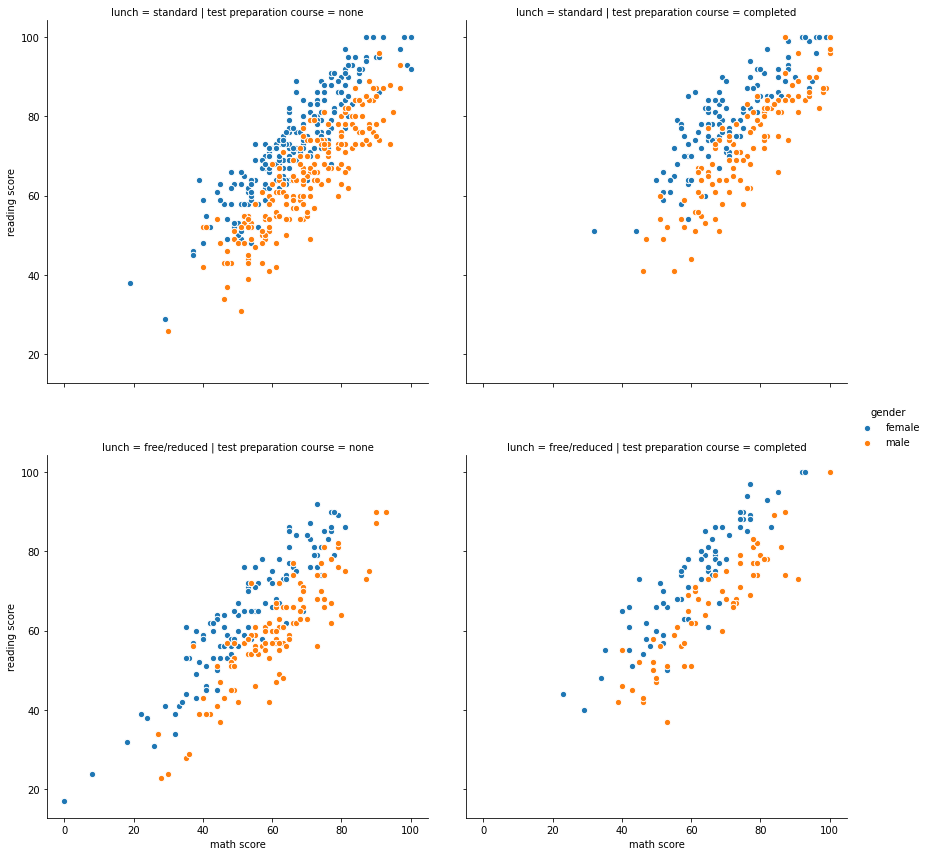

In [34]:
g = sns.FacetGrid(data=df,col='test preparation course',row='lunch', hue='gender', height=6)
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w", s=40)
g.add_legend()
plt.subplots_adjust(hspace=0.2, wspace=0.1)

# Matrix Plots

In [35]:
df = pd.read_csv('../Notebooks/05-Seaborn/country_table.csv')

In [36]:
df = df.set_index('Countries')
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


## 1.heatmap()

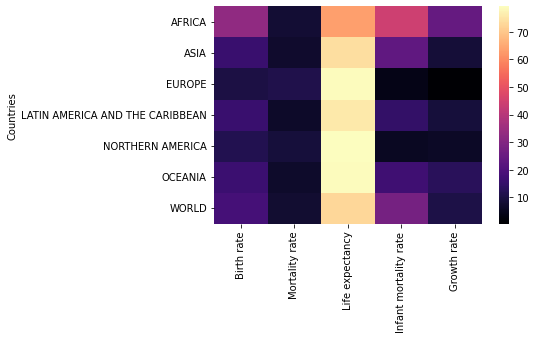

In [37]:
sns.heatmap(df, cmap='magma');
# life expectency is in another order so we omit it

In [38]:
ratedf = df.drop('Life expectancy', axis=1)

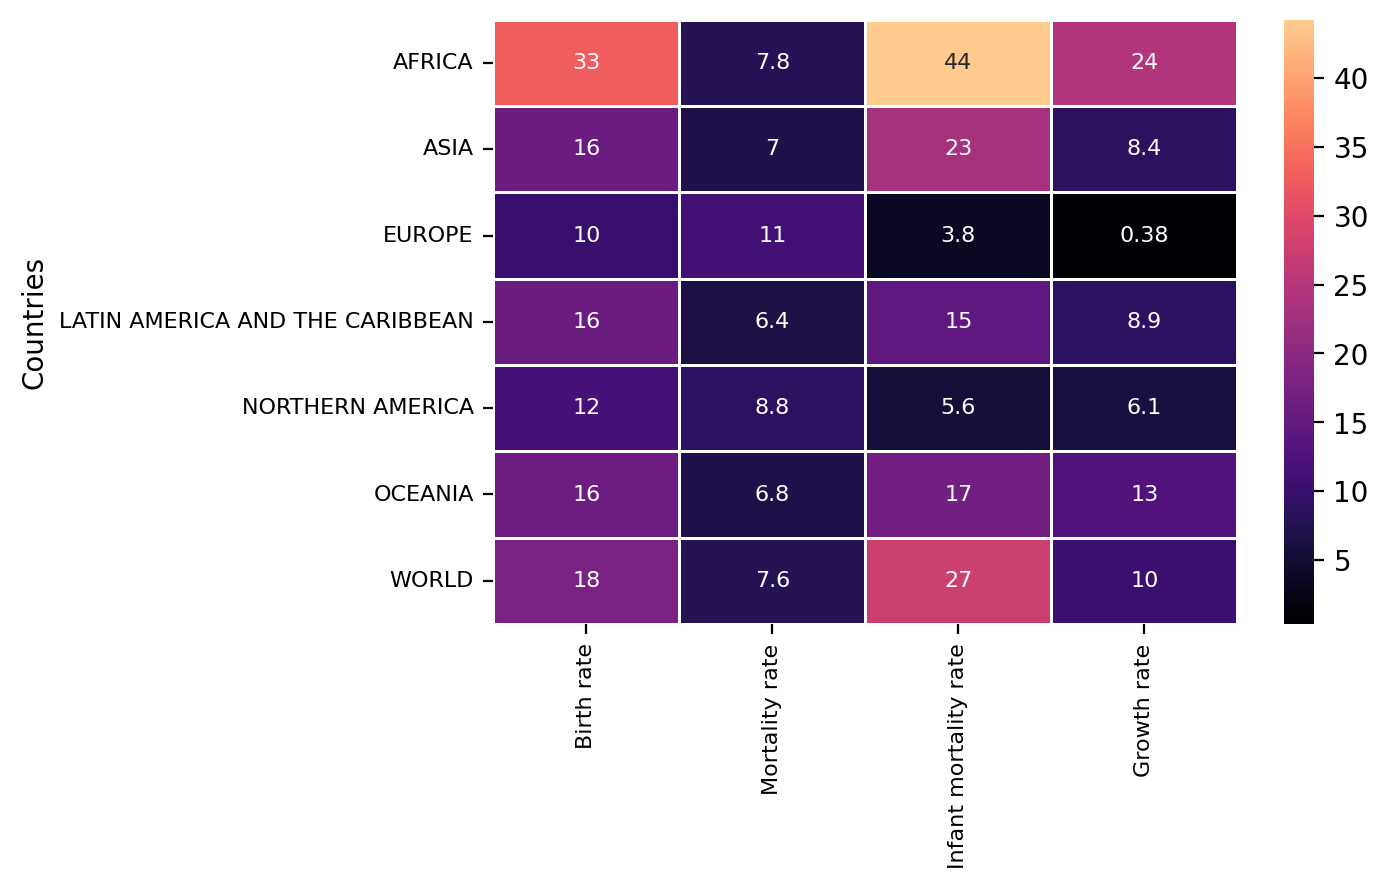

In [39]:
plt.figure(dpi=200)

sns.heatmap(ratedf, lw=0.5, annot=True, annot_kws={"size": 8}, cmap='magma', center=25)

plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8);

## 2.clustermap()

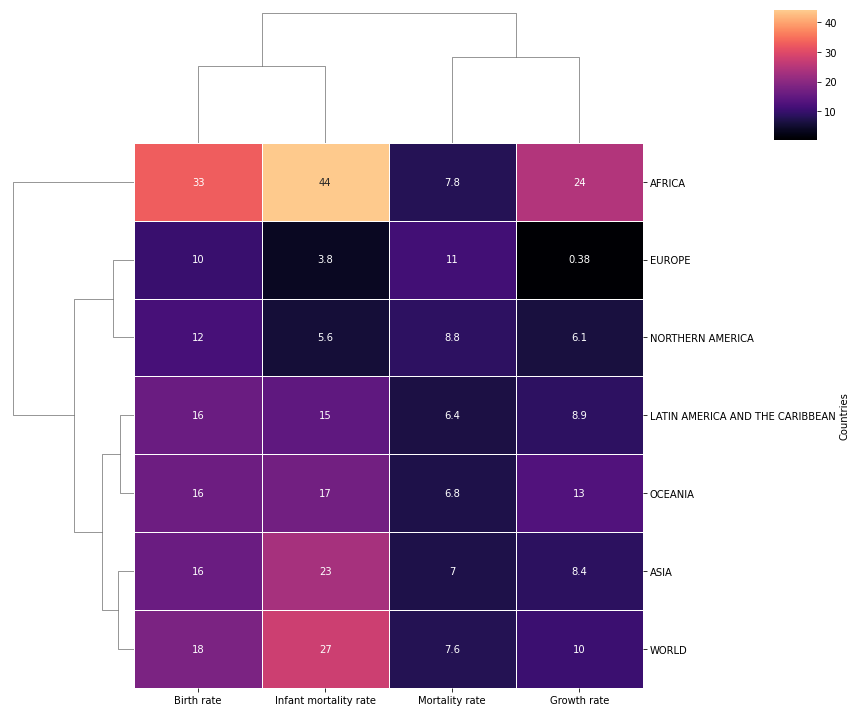

In [40]:
sns.clustermap(ratedf, cmap='magma', center=25, annot=True, annot_kws={"size": 10}, lw=0.5,
               method='average', figsize=(12, 10), cbar_pos=(0.9, 0.8, 0.05, 0.18),)
plt.savefig('cluster.jpg', dpi=200)

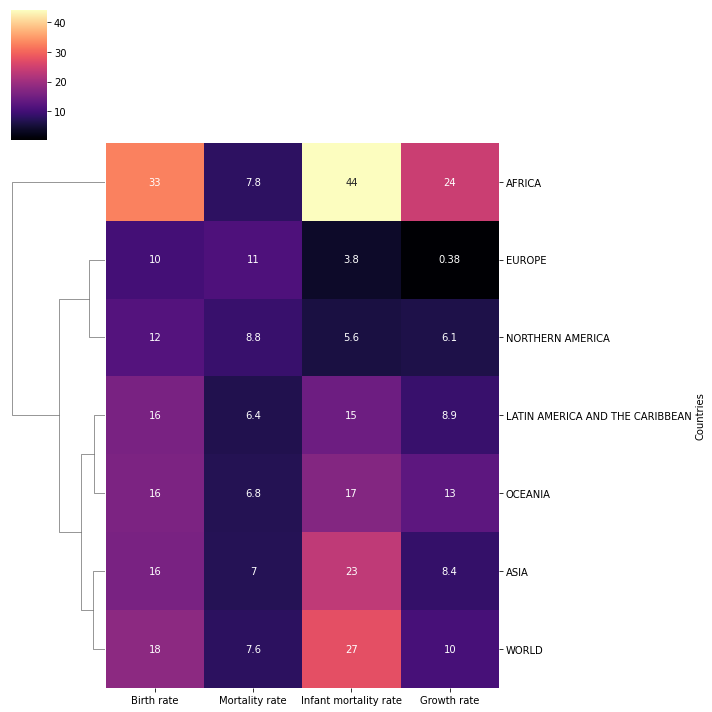

In [41]:
sns.clustermap(ratedf, cmap='magma', annot=True, col_cluster=False)